In [1]:
%matplotlib inline
import logging
import matplotlib.pyplot as plt
import os
import pandas
import requests
import sys
WTK_URL = "https://h2oq9ul559.execute-api.us-west-2.amazonaws.com/dev"
os.environ['PYWTK_CACHE_DIR'] = os.path.join(os.environ['HOME'], "pywtk-data")
from pywtk.wtk_api import get_nc_data, get_nc_data_from_url, WIND_MET_NC_DIR
logging.basicConfig()

/Users/hsorense/anaconda2/envs/pywtk/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Load interesting sites

In [2]:
import csv
site_data = {}
with open('interesting_sites.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        site_data[row['site_id']] = row
all_site_ids = site_data.keys()

### Pull data for first 10 sites from met

In [3]:
site_id = all_site_ids[0]
start = pandas.Timestamp('2013-01-01', tz='utc')
end = pandas.Timestamp('2013-01-07', tz='utc')
utc = True
attributes = ["power", "wind_direction", "wind_speed", "temperature", "pressure", "density"]
met_data = {}
for site_id in all_site_ids[:10]:
    #met_data[site_id] = get_nc_data_from_url(WTK_URL+"/met", site_id, start, end, attributes, utc=utc)
    met_data[site_id] = get_nc_data(site_id, start, end, attributes, utc=utc, nc_dir=WIND_MET_NC_DIR)

### Concatenate all data into a single dataframe

In [4]:
for (site_id, site_df) in met_data.iteritems():
    site_df['site_id'] = site_id
total_df = pandas.concat(met_data.values())

In [5]:
total_df.head()

,power,wind_direction,wind_speed,temperature,pressure,density,site_id
datetime,,,,,,,
2013-01-01 00:00:00+00:00,12.0,261.493591,15.595691,269.663483,94172.281250,1.202499,110556
2013-01-01 00:05:00+00:00,12.0,261.411224,15.470577,269.694000,94175.023438,1.202423,110556
2013-01-01 00:10:00+00:00,12.0,261.229919,15.372921,269.724518,94173.195312,1.202224,110556
2013-01-01 00:15:00+00:00,12.0,261.191406,15.302741,269.764191,94170.445312,1.201983,110556
2013-01-01 00:20:00+00:00,12.0,261.438446,15.232550,269.819122,94167.703125,1.201702,110556


### Create a wind speed and a power dataframe for export.

In [6]:
power_df=total_df.reset_index().pivot(columns='site_id', index='datetime', values='power')
wind_df=total_df.reset_index().pivot(columns='site_id', index='datetime', values='wind_speed')

### Plot power and wind speed for each site id

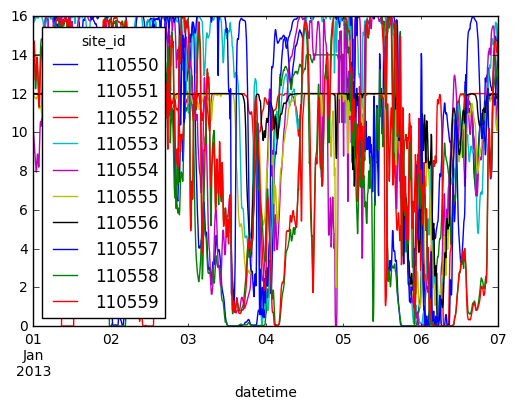

In [7]:
power_df.plot()

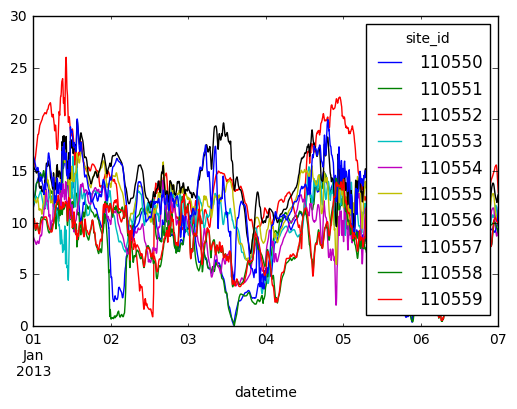

In [8]:
wind_df.plot()

In [9]:
wind_df.to_csv('wtk_wind.csv')
power_df.to_csv('wtk_power.csv')

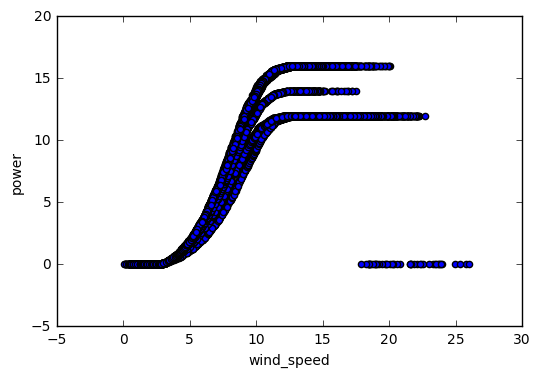

In [10]:
total_df.plot(kind='scatter', x='wind_speed', y='power')

In [11]:
!head wtk_power.csv

datetime,110550,110551,110552,110553,110554,110555,110556,110557,110558,110559
2013-01-01 00:00:00+00:00,15.6285886765,13.7866067886,12.0,15.9345083237,10.1635789871,11.9322319031,12.0,16.0,13.8331003189,14.1082963943
2013-01-01 00:05:00+00:00,15.6792879105,13.7872276306,12.0,15.8995666504,9.89879608154,11.906001091,12.0,16.0,14.1915636063,14.4556999207
2013-01-01 00:10:00+00:00,15.7358627319,13.807964325,12.0,15.8542642593,9.72091388702,11.8814544678,12.0,16.0,14.5493803024,14.7076730728
2013-01-01 00:15:00+00:00,15.7981758118,13.8430233002,12.0,15.80519104,9.54270076752,11.8589296341,12.0,16.0,14.6957712173,14.7123565674
2013-01-01 00:20:00+00:00,15.8519878387,13.8788614273,12.0,15.7692365646,9.30900192261,11.834236145,12.0,16.0,14.4948415756,14.4862213135
2013-01-01 00:25:00+00:00,15.9218845367,13.9322242737,12.0,15.7614927292,9.06701946259,11.8106994629,12.0,16.0,13.9958658218,13.9175300598
2013-01-01 00:30:00+00:00,16.0,13.9990129471,12.0,15.7875452042,8.90471744537,11.8008394241,